# Prueba de evaluación 1

### parte 2

In [1]:
import pandas as pd 
import numpy as np 
import ggplot as g 
import datetime 
from ggplot import * 
from numpy import convolve 
import matplotlib.pyplot as plt
import random


maximo minimo y medio de la variable carat


In [2]:
max(diamonds['carat'])
min(diamonds['carat'])
mean_of_distribution = diamonds['carat'].mean()
variance_of_distribution = diamonds['carat'].var()
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dibujar el histograma de la variable Carat


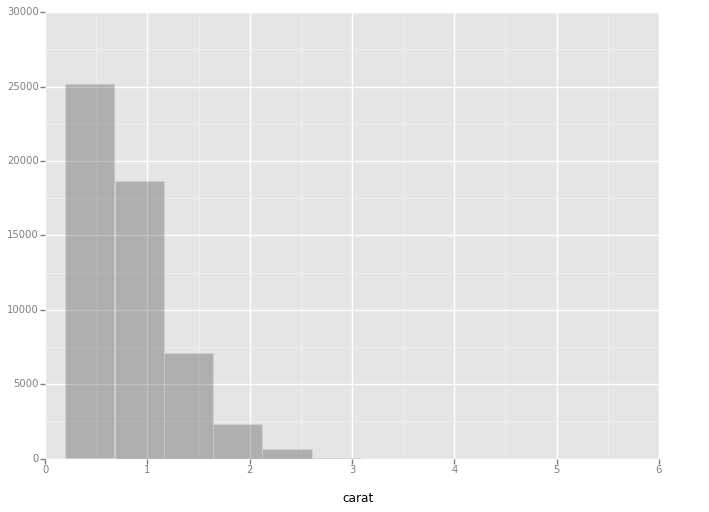

<ggplot: (8760223254985)>

In [3]:
%matplotlib inline
p=ggplot(aes(x='carat'),data=diamonds)+geom_histogram(alpha=0.3)
p

Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria

del mismo tamaño con puntos obtenidos de una distribución gamma con la misma

media y desviación típica. Haz que la visualización sea más adecuada haciendo

transparente uno de los histogramas utilizando el parámetro alpha.

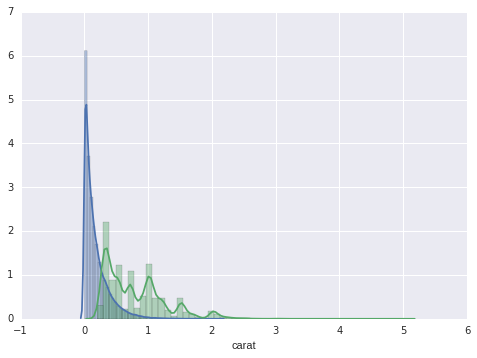

In [4]:
#qplot(diamonds["carat"])
import seaborn as sns

# force integer values to get integer sample
gamma_distribution = np.random.gamma(mean_of_distribution,variance_of_distribution,len(diamonds['carat']))
gamma = pd.DataFrame(gamma_distribution, columns=['carat'])
gamma.head(5)
sns.distplot(gamma_distribution)
sns.distplot(diamonds['carat'])

Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos
ejes en escala logarítmica.

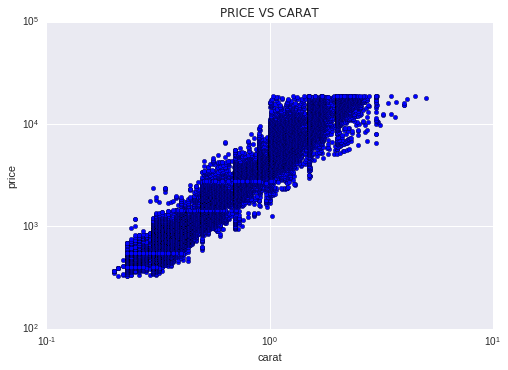

In [5]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(diamonds['carat'] ,diamonds['price'])
ax.set_title('PRICE VS CARAT')
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_yscale('log')
ax.set_xscale('log')

Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea"SI1"

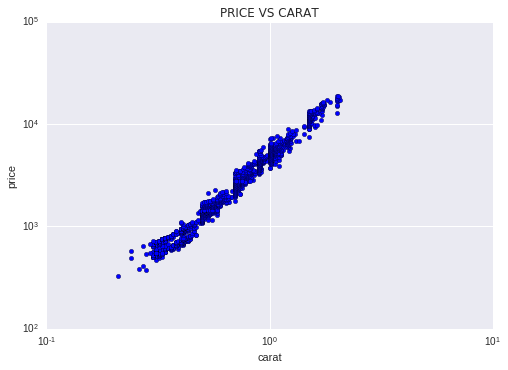

In [6]:
filtered = diamonds[(diamonds['color'] =='E') & (diamonds['clarity']=='SI1')]
fig = plt.figure()
ax = plt.gca()
ax.scatter(filtered['carat'] ,filtered['price'])
ax.set_title('PRICE VS CARAT')
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_yscale('log')
ax.set_xscale('log')

Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de

x, y, z) y el precio, de nuevo en escala logarítmica.

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


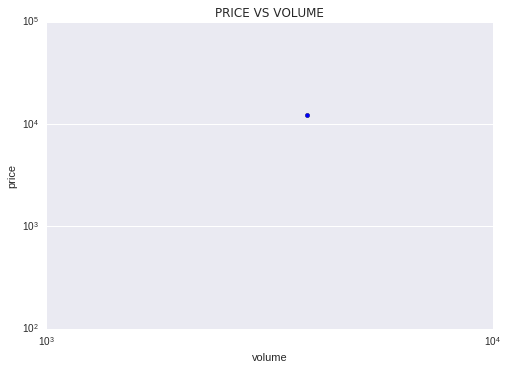

In [7]:
diamonds['volume']=diamonds['x']*diamonds['y']*diamonds['z']
fig = plt.figure()
ax = plt.gca()
ax.scatter(diamonds['volume'] ,diamonds['price'])
ax.set_title('PRICE VS VOLUME')
ax.set_xlabel('volume')
ax.set_ylabel('price')
ax.set_yscale('log')
ax.set_xscale('log')
diamonds.head(5)

Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de
regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [14]:
from scipy import stats
test = diamonds[:1000]
slope, intercept, r_value, p_value, std_err = stats.linregress(test['price'],test['volume'])
print (r_value,p_value,std_err)

(0.8647715268306605, 8.1360097692254665e-301, 0.00059154288837247467)


Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando
al diagrama las distribuciones de las dos variables.

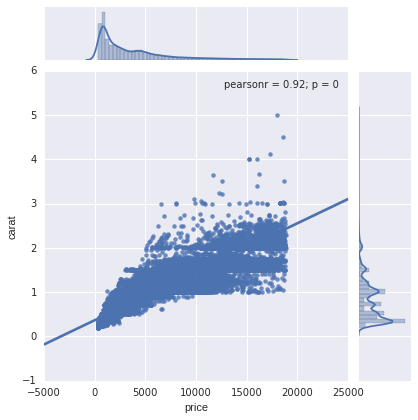

In [18]:

sns.jointplot(x="price", y="carat", data=diamonds, kind="reg")

Identifica con un comando los diferentes tipos de corte (cut).


In [19]:
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Comprueba si hay diferencias significativas en la media del precio para los de corte
"Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede
asumir que las muestras son de una distribución normal). Puedes investigar funciones
lógicas vectorizadas en NumPy como logical_or().

In [38]:

sample = diamonds.ix[random.sample(diamonds.index, 1000)]
print(sample[(sample['cut']=='Ideal') | (sample['cut']=='Premium')]['price'].mean())
print(sample[(sample['cut']<>'Ideal') | (sample['cut']<>'Premium')]['price'].mean())

#diamonds.groupby('cut')['price'].mean()

3735.1984252
3687.425


Obten la mediana del precio por cada valor de la claridad (clarity) y ordena los
resultados de manera descendente


In [53]:
test = diamonds.groupby('clarity')['price'].median()
test.sort_values(ascending=False)


clarity
SI2     4072
I1      3344
SI1     2822
VS2     2054
VS1     2005
VVS2    1311
VVS1    1093
IF      1080
Name: price, dtype: int64